<a href="https://colab.research.google.com/github/jnsbrdbr/thesis/blob/thesis/part10_unsmote_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip3 install pickle5
import pickle5 as pickle

In [4]:
with open('/content/drive/MyDrive/10000/unsmote/TUnsmote_Tresult.pkl', "rb") as fh:
  result = pickle.load(fh)

In [5]:
#final data
print(result)

             0         1         2  ...         8         9  label
0    -0.018442 -4.220618 -0.916300  ... -0.010241 -0.181514      1
1    -0.018442 -4.220618 -0.916300  ... -0.010241 -0.181514      1
2    -0.018442 -4.220618 -0.916300  ... -0.010241 -0.181514      1
3    -0.018442 -4.220618 -0.916300  ... -0.010241 -0.181514      1
4    -0.018444 -4.221080 -0.916678  ...  0.057121  0.838856      1
...        ...       ...       ...  ...       ...       ...    ...
9995 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1
9996 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1
9997 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1
9998 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1
9999 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1

[10000 rows x 101 columns]


In [6]:
#divide data in to data_label and non_data label

import copy
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel
y=result.label

In [7]:
#splitting data in to test and train...

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

In [8]:
#train the data

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [9]:
#score of data by prediction at once

predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9924


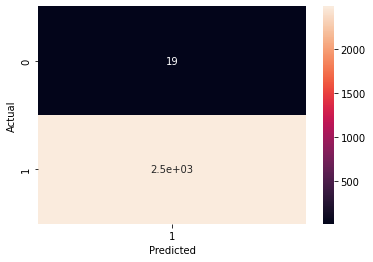

In [10]:
#plotting confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [11]:
#Accuracy by prediction in once

print('Accuracy: ',metrics.accuracy_score(y_test, predictions))

Accuracy:  0.9924


In [12]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 2481
False Positives: 19
True Negatives: 0
False Negatives: 0


In [13]:
#cross_validation and accuracy

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore') 

cv = KFold(n_splits=10)#, random_state=42, shuffle=True
scores = cross_val_score(logisticRegr, X, y, scoring='accuracy', cv=cv)# ,n_jobs=None,n_jobs=-1


print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.791 (0.202)


In [14]:
#recall

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"


cv = KFold(n_splits=10)#, shuffle=True, random_state=42
scores_recall = cross_val_score(logisticRegr,X, y, scoring='recall', cv=cv)#,n_jobs=-1

print('scores_recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))

scores_recall: 0.796 (0.206)


In [15]:
#precision

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

cv = KFold(n_splits=10)#, shuffle=True, random_state=42
scores_precision = cross_val_score(logisticRegr, X, y, scoring='precision', cv=cv,pre_dispatch=2)#,n_jobs=-1,pre_dispatch

print('scores_precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))

scores_precision: 0.991 (0.003)


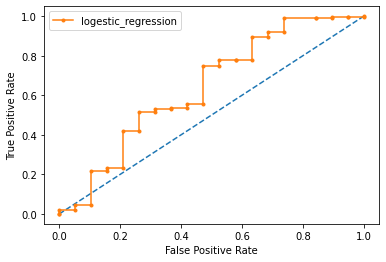


 Logistic ROC AUC 0.640


In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logisticRegr = LogisticRegression(solver= 'liblinear',max_iter=5000)#max_iter=10000
logisticRegr.fit(x_train, y_train)
yhat = logisticRegr.predict_proba(x_test)
pos_probs = yhat[:, 1]
pyplot.plot([0, 1], [0, 1], linestyle='--')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='logestic_regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
roc_auc = roc_auc_score(y_test, yhat[:, 1])
print('\n','Logistic ROC AUC %.3f' % roc_auc)

In [17]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
 
 
#Implementing cross validation
 
#X = X.sample(frac = 1)
#y= y.sample(frac = 1)
kf = KFold(n_splits=10)#, random_state=None
model = LogisticRegression()#(solver= 'liblinear'),max_iter=1000000
 
acc_score = list()
res_tpr = list()
res_fpr = list()
for train_index , test_index in kf.split(X):
    #X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    #y_train , y_test = y[train_index] , y[test_index]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_values, labels=[0, 1]).ravel()
    print(f'True Positives: {tp}')
    print(f'False Positives: {fp}')
    print(f'True Negatives: {tn}')
    print(f'False Negatives: {fn}')
    tpr=(np.divide(tp,(tp+fn)))
    fpr=(np.divide(fp,(fp+tn)))
    if tp==0:
      tpr=0
    if fp==0:
      fpr=0

    print('tpr=%.4f fpr=%.3f' % ( mean(tpr), mean(fpr)))
    print('x')
    res_tpr.append(mean(tpr))
    res_fpr.append(mean(fpr))
    print('---------------------')

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = np.sum(acc_score)/10
total_tpr=np.sum(res_tpr)/10
total_fpr=np.sum(res_fpr)/10
print('\n\n','total_fpr=%.3f' % (total_fpr))#total_tpr=%.4f(total_tpr,)

True Positives: 2971
False Positives: 24
True Negatives: 1
False Negatives: 4
tpr=0.9987 fpr=0.960
x
---------------------
True Positives: 2971
False Positives: 26
True Negatives: 0
False Negatives: 3
tpr=0.9990 fpr=1.000
x
---------------------
True Positives: 2971
False Positives: 26
True Negatives: 1
False Negatives: 2
tpr=0.9993 fpr=0.963
x
---------------------
True Positives: 2973
False Positives: 26
True Negatives: 0
False Negatives: 1
tpr=0.9997 fpr=1.000
x
---------------------
True Positives: 2969
False Positives: 25
True Negatives: 0
False Negatives: 6
tpr=0.9980 fpr=1.000
x
---------------------
True Positives: 2959
False Positives: 33
True Negatives: 1
False Negatives: 7
tpr=0.9976 fpr=0.971
x
---------------------
True Positives: 2962
False Positives: 32
True Negatives: 2
False Negatives: 4
tpr=0.9987 fpr=0.941
x
---------------------
True Positives: 2968
False Positives: 25
True Negatives: 0
False Negatives: 7
tpr=0.9976 fpr=1.000
x
---------------------
True Positives: 